In [34]:
import nltk


In [35]:
#nltk.download_shell()

In [36]:
#importing libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
sns.set_style('whitegrid')

In [39]:
#getting the data

In [40]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])

In [41]:
#exploratory data analysis

In [42]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [44]:
messages.groupby('label').head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [45]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [46]:
messages['lenght'] = messages['message'].apply(len)

In [47]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
#data visualization 

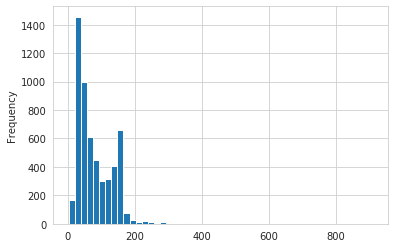

In [49]:
messages['lenght'].plot.hist(bins=50)

In [50]:
messages['lenght'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b9f139d90>,
      dtype=object)

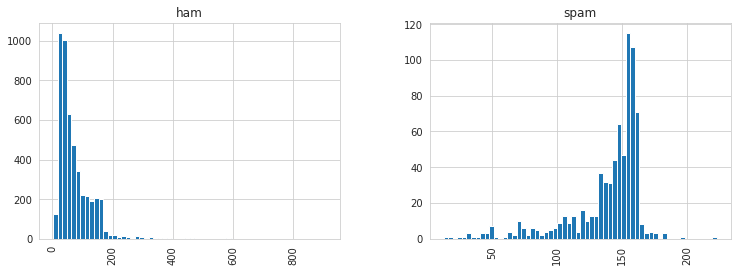

In [51]:
messages.hist(column = 'lenght',by ='label',bins = 60,figsize=(12,4))

In [52]:
#text pre-processing

In [53]:
import string

In [54]:
from nltk.corpus import stopwords

In [55]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [56]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [57]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [58]:
#vectorization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])



In [61]:
print(len(bow_transformer.vocabulary_))

11425


In [62]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [63]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

UIN
schedule


In [64]:
messages_bow = bow_transformer.transform(messages['message'])

In [66]:
print('shape of sparse matrix:',messages_bow.shape)

shape of sparse matrix: (5572, 11425)


In [68]:
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Amount of Non-Zero occurences:  50548


In [69]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [74]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [ ]:
#trainning a model

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [78]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [ ]:
#model evaluation

In [79]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [80]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [ ]:
#train test split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)


In [ ]:
#creating a data pipeline

In [83]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [86]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2b9c0d27a0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [87]:
predictions = pipeline.predict(msg_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       952
        spam       1.00      0.66      0.79       163

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

